In [43]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
estaticos_market = pd.read_csv('estaticos_market.csv')
estaticos_market.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
data = estaticos_market[[
    'id', 
    'de_natureza_juridica', 
    'sg_uf', 
    'natureza_juridica_macro',
    'de_ramo',
    'setor',
    'idade_empresa_anos',
    'idade_emp_cat',
    'fl_mei',
    'dt_situacao',
    'fl_email',
    'fl_telefone',
    'fl_rm',
    'nm_divisao',
    'nm_segmento',
    'fl_optante_simples',
    'fl_optante_simei',
    'sg_uf_matriz',
    'de_saude_tributaria',
    'de_saude_rescencia',
    'nu_meses_rescencia',
    'de_nivel_atividade',
    'nm_meso_regiao',
    'nm_micro_regiao',
    'fl_passivel_iss',
    'de_faixa_faturamento_estimado',
    'de_faixa_faturamento_estimado_grupo'
]]

In [4]:
def print_null_cols(df):
    for col in df.columns:
        nulls_value = df[col].isna().sum()
        percentage = 100*(nulls_value / df.shape[0])
        message = "Column {} has {} nulls / {}% ".format(col, nulls_value, percentage)
        print(message)
        
print_null_cols(data)      

Column id has 0 nulls / 0.0% 
Column de_natureza_juridica has 0 nulls / 0.0% 
Column sg_uf has 0 nulls / 0.0% 
Column natureza_juridica_macro has 0 nulls / 0.0% 
Column de_ramo has 0 nulls / 0.0% 
Column setor has 1927 nulls / 0.4168307022742906% 
Column idade_empresa_anos has 0 nulls / 0.0% 
Column idade_emp_cat has 0 nulls / 0.0% 
Column fl_mei has 0 nulls / 0.0% 
Column dt_situacao has 6 nulls / 0.0012978641482333905% 
Column fl_email has 0 nulls / 0.0% 
Column fl_telefone has 0 nulls / 0.0% 
Column fl_rm has 0 nulls / 0.0% 
Column nm_divisao has 1927 nulls / 0.4168307022742906% 
Column nm_segmento has 1927 nulls / 0.4168307022742906% 
Column fl_optante_simples has 82713 nulls / 17.891706215471405% 
Column fl_optante_simei has 82713 nulls / 17.891706215471405% 
Column sg_uf_matriz has 1939 nulls / 0.41942643057075735% 
Column de_saude_tributaria has 14851 nulls / 3.2124300775690138% 
Column de_saude_rescencia has 14851 nulls / 3.2124300775690138% 
Column nu_meses_rescencia has 45276

## Primeira tentativa é preencher com 0 os valores nulos.

tentar modificar esses valores com outras estratégias mais tarde

In [5]:
data.fillna(0, inplace=True)

/home/igor/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [6]:

print_null_cols(data)  

Column id has 0 nulls / 0.0% 
Column de_natureza_juridica has 0 nulls / 0.0% 
Column sg_uf has 0 nulls / 0.0% 
Column natureza_juridica_macro has 0 nulls / 0.0% 
Column de_ramo has 0 nulls / 0.0% 
Column setor has 0 nulls / 0.0% 
Column idade_empresa_anos has 0 nulls / 0.0% 
Column idade_emp_cat has 0 nulls / 0.0% 
Column fl_mei has 0 nulls / 0.0% 
Column dt_situacao has 0 nulls / 0.0% 
Column fl_email has 0 nulls / 0.0% 
Column fl_telefone has 0 nulls / 0.0% 
Column fl_rm has 0 nulls / 0.0% 
Column nm_divisao has 0 nulls / 0.0% 
Column nm_segmento has 0 nulls / 0.0% 
Column fl_optante_simples has 0 nulls / 0.0% 
Column fl_optante_simei has 0 nulls / 0.0% 
Column sg_uf_matriz has 0 nulls / 0.0% 
Column de_saude_tributaria has 0 nulls / 0.0% 
Column de_saude_rescencia has 0 nulls / 0.0% 
Column nu_meses_rescencia has 0 nulls / 0.0% 
Column de_nivel_atividade has 0 nulls / 0.0% 
Column nm_meso_regiao has 0 nulls / 0.0% 
Column nm_micro_regiao has 0 nulls / 0.0% 
Column fl_passivel_iss ha

## Tratar corretamente algunas dados

as colunas **de_faixa_faturamento_estimado** e **de_saude_rescencia** possuem o valor **SEM INFORMACAO**, então os valores que foram preenchidos com 0 devem ser modificados

In [32]:
print(data[data.de_faixa_faturamento_estimado == 0].shape)
print(data[data.de_saude_rescencia == 0].shape)

(27513, 27)
(14851, 27)


In [33]:
print(data[data.de_faixa_faturamento_estimado == 'SEM INFORMACAO'].shape)
print(data[data.de_saude_rescencia == 'SEM INFORMACAO'].shape)

(1173, 27)
(30425, 27)


 --> Aplicar modificação

In [35]:
data.loc[data.de_faixa_faturamento_estimado == 0, 'de_faixa_faturamento_estimado'] = 'SEM INFORMACAO'
data.loc[data.de_saude_rescencia == 0, 'de_saude_rescencia'] = 'SEM INFORMACAO'

/home/igor/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
print(data[data.de_faixa_faturamento_estimado == 0].shape)
print(data[data.de_saude_rescencia == 0].shape)
print(data[data.de_faixa_faturamento_estimado == 'SEM INFORMACAO'].shape)
print(data[data.de_saude_rescencia == 'SEM INFORMACAO'].shape)

(0, 27)
(0, 27)
(28686, 27)
(45276, 27)


## Categorical variables


In [41]:
#colunas que serão tratadas
features = [ 'de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro',
       'de_ramo', 'setor', 'idade_emp_cat', 'fl_mei',
       'dt_situacao', 'fl_email', 'fl_telefone', 'fl_rm', 'nm_divisao',
       'nm_segmento', 'fl_optante_simples', 'fl_optante_simei', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia',
       'de_nivel_atividade', 'nm_meso_regiao', 'nm_micro_regiao',
       'fl_passivel_iss', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo']

In [47]:
data_labeled = data.copy()

In [51]:
for col in features:
    encoder = preprocessing.LabelEncoder()
    data_labeled[col] = encoder.fit_transform(data_labeled[col].astype(str))

In [53]:
data_labeled.head()

,id,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_mei,dt_situacao,...,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,57,4,2,3,3,14.457534,1,0,2710,...,20,5,0,23.0,1,7,49,2,2,3
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,9,3,5,14,5,1.463014,0,1,6812,...,17,3,1,9.0,2,5,70,2,10,11
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,9,1,5,26,5,7.093151,3,1,4784,...,3,1,0,26.0,3,3,44,2,1,2
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,9,1,5,18,5,6.512329,3,0,4995,...,3,1,0,26.0,3,3,44,2,10,11
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,9,4,5,20,5,3.200000,0,0,6184,...,20,5,0,27.0,1,7,49,2,10,11


# Scaler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff918bb7550>,
      dtype=object)

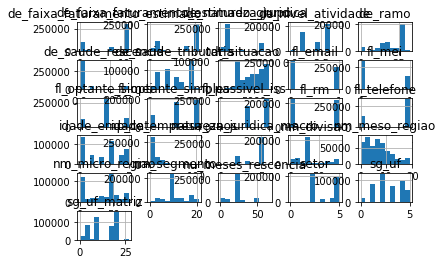

In [59]:
%matplotlib inline 

data_labeled.hist()

## MinMax Scaler
Devido a distribuição dos valores, usaremos o MinMaxScaler

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [65]:
features_scaler = ['de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro',
       'de_ramo', 'setor', 'idade_empresa_anos', 'idade_emp_cat', 'fl_mei',
       'dt_situacao', 'fl_email', 'fl_telefone', 'fl_rm', 'nm_divisao',
       'nm_segmento', 'fl_optante_simples', 'fl_optante_simei', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia', 'nu_meses_rescencia',
       'de_nivel_atividade', 'nm_meso_regiao', 'nm_micro_regiao',
       'fl_passivel_iss', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo']

data_scaler = data_labeled.copy()
data_scaler[features_scaler] = scaler.fit_transform(data_labeled[features_scaler])

/home/igor/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [66]:
data_scaler.head()

,id,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_mei,dt_situacao,...,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,0.863636,0.8,0.333333,0.09375,0.6,0.135704,0.2,0.0,0.369512,...,0.740741,0.833333,0.00,0.348485,0.25,0.368421,0.671233,1.0,0.181818,0.272727
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,0.136364,0.6,0.833333,0.43750,1.0,0.013594,0.0,1.0,0.928825,...,0.629630,0.500000,0.25,0.136364,0.50,0.263158,0.958904,1.0,0.909091,1.000000
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,0.136364,0.2,0.833333,0.81250,1.0,0.066500,0.6,1.0,0.652304,...,0.111111,0.166667,0.00,0.393939,0.75,0.157895,0.602740,1.0,0.090909,0.181818
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,0.136364,0.2,0.833333,0.56250,1.0,0.061042,0.6,0.0,0.681074,...,0.111111,0.166667,0.00,0.393939,0.75,0.157895,0.602740,1.0,0.909091,1.000000
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,0.136364,0.8,0.833333,0.62500,1.0,0.029916,0.0,0.0,0.843196,...,0.740741,0.833333,0.00,0.409091,0.25,0.368421,0.671233,1.0,0.909091,1.000000


# Modelo de predição

# Métrica



In [69]:

def extractPortfolio(market, portfolio):
    '''Retira as amostras do portifolio do mercado
    
    Retorna:
        Mercado sem portfolio
        Portifolio
    '''
    portfolio_id = portfolio.id
    port = market[market.id.isin( portfolio_id.values)]
    market_new =  market.drop(market[market.id.isin(portfolio_id.values)].index)
    return market_new , port

### Ideia

seeds = [ 123, 345, 321, 1324, 45, 9, 86] #seeds fixas para ter sempre a mesma métrica

for s in seeds:
    fora , dentro , _, _ = train_test_split(port, port, test_size=0.33, random_state=s)

    m, p = extractPortfolio(market, dentro)

    result = get_recommendations(m, p) # get recomendation com portfolio e mercado separados

    overlap_rec = check(result, fora) # verifica se as amostras  que n foram usadas, foram listadas no resultado
    metrics.append(overlap_rec)


metric = metrics.mean() #gerar isso para todos os portfolios